In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../')
import multi_axis as ma
%config Completer.use_jedi = False

In [2]:
def omf_to_mag(data):
    """ Extract magnetization in grid array from ubermag 'system' object """
    #ms = system.m.array
    ms = data
    shape = np.shape(ms)

    xs,ys,zs,mx,my,mz = [],[],[],[],[],[]
    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                xs.append(i)
                ys.append(j)
                zs.append(k)
                mx.append(ms[i][j][k][0])
                my.append(ms[i][j][k][1])
                mz.append(ms[i][j][k][2])
    Mx,My,Mz = np.reshape(mx,(shape[0],shape[1],shape[2])),\
                            np.reshape(my,(shape[0],shape[1],shape[2])), \
                            np.reshape(mz,(shape[0],shape[1],shape[2]))
    return Mx,My,Mz

def plot_2d_mag_slice(mx,my,mz,mesh_params=None,Ms=None,s=1):
    """ Takes x/y magnetisation projections and creates a plot
        uses quivers for direction and colour for magnitude """
    if type(Ms) == type(None):
        Ms = np.max(np.max((mx**2+my**2)**.5))
    
    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca()

    if type(mesh_params) == type(None):
        p1 = (0,0,0)
        sx,sy = np.shape(mx)
        p2 = (sx,sy,sx)
        n = p2
    else:
        p1,p2,n = mesh_params
        
    x = np.linspace(p1[0],p2[0],num=n[0])
    y = np.linspace(p1[1],p2[1],num=n[1])
    xs,ys = np.meshgrid(x,y)
    
    plt.quiver(xs[::s,::s],ys[::s,::s],mx[::s,::s].T,my[::s,::s].T,pivot='mid',scale=Ms*22,width=0.009,headaxislength=5,headwidth=4,minshaft=1.8)
    mag = (mx**2+my**2)**.5
    plt.imshow(mz.T,origin='lower',extent=[p1[0],p2[0],p1[1],p2[1]],vmin=-Ms,vmax=Ms,cmap='RdBu_r')
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('$M_z$ / A/m ', rotation=-270,fontsize=15)
    
    plt.xlabel('x / m',fontsize=15)
    plt.ylabel('y / m',fontsize=15)
    plt.show()

In [3]:
# load magnetisation array
m = np.load(r'D-90nm_t-20nm_B-0T-skyrmion.npy')

# convert format
MX,MY,MZ = omf_to_mag(m)

# Pad z axis
MX = np.pad(MX,[(0,0),(0,0),(14,14)],mode='constant')
MY = np.pad(MY,[(0,0),(0,0),(14,14)],mode='constant')
MZ = np.pad(MZ,[(0,0),(0,0),(14,14)],mode='constant')

# cell size
#thickness = 20e-9
cell = (2.5e-9, 2.5e-9, 2.5e-9)
d = 90e-9
p1 = (0, 0, 0)
p2 = (d, d, d)#thickness)
n = (np.array(p2)/np.array(cell)).astype(int)
mesh_params = [p1,p2,n]

In [17]:
mesh_params

[(0, 0, 0), (9e-08, 9e-08, 9e-08), array([36, 36, 36])]

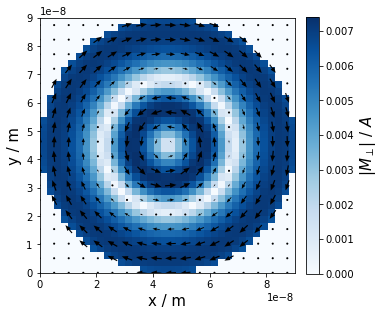

In [4]:
mx,my = ma.project_along_z(MX,mesh_params=mesh_params),ma.project_along_z(MY,mesh_params=mesh_params)
ma.plot_2d_mag(mx,my,mesh_params=mesh_params,s=2)

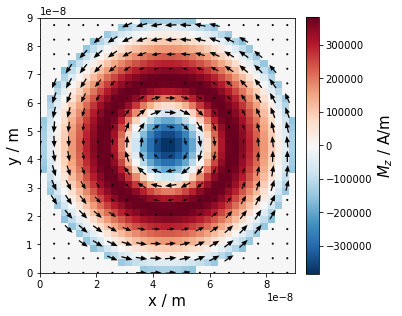

In [16]:
i=18
plot_2d_mag_slice(MX[::-1,::-1,i],MY[::-1,::-1,i],MZ[::-1,::-1,i],mesh_params=mesh_params,s=2)

In [6]:
ma.save_B_to_paraview('M_skyrmion.vts',MX,MY,MZ)

In [4]:
n=36
AX,AY,AZ,mesh_params2 = ma.calculate_A_3D(MX,MY,MZ,mesh_params=mesh_params,n_pad=n)
# B 3d
BX,BY,BZ = ma.calculate_B_from_A(AX,AY,AZ,mesh_params=mesh_params2)

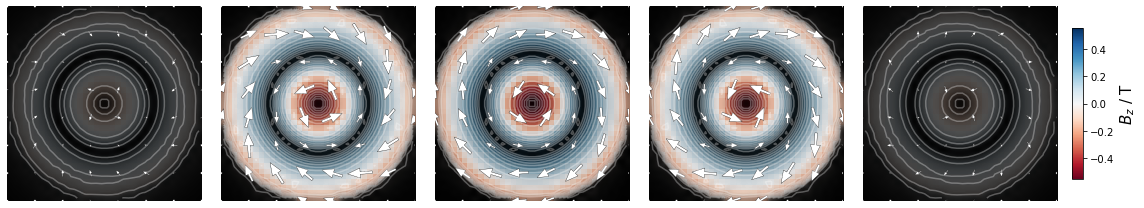

In [30]:
ma.plot_B_series(BX[n:-n,n:-n,n:-n],BY[n:-n,n:-n,n:-n],BZ[n:-n,n:-n,n:-n],slices=[13,15,19,20,22])

In [26]:
ma.save_B_to_paraview('B-true_skyrmion.vts',BX[n:-n,n:-n,n:-n],BY[n:-n,n:-n,n:-n],BZ[n:-n,n:-n,n:-n])

In [31]:
ma.save_B_to_paraview('A_skyrmion.vts',AX[n:-n,n:-n,n:-n],AY[n:-n,n:-n,n:-n],AZ[n:-n,n:-n,n:-n])

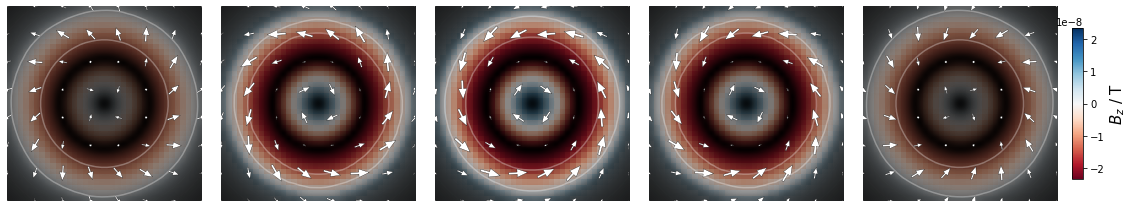

In [32]:
ma.plot_B_series(AX[n:-n,n:-n,n:-n],AY[n:-n,n:-n,n:-n],AZ[n:-n,n:-n,n:-n],slices=[13,15,19,20,22])

In [42]:
as_x,as_y,pxs,pys = ma.dual_axis_phase_generation(MX,MY,MZ,mesh_params,n_tilt= 71,a_range=70,n_pad=n)

Text(0.5, 1.0, '(70$^{\\circ}$, 0$^{\\circ}$, 0$^{\\circ}$)')

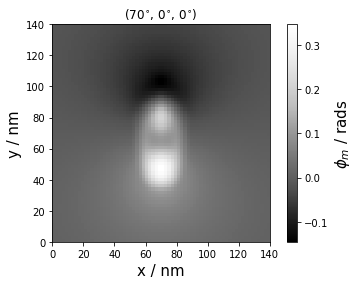

In [82]:
plt.imshow(np.flipud(pxs[20:-20,70,20:-20].T),cmap='Greys_r',vmax=np.max(pxs),vmin=np.min(pxs),extent=[0,140,0,140])
cbar = plt.colorbar()
cbar.set_label('$\phi_m$ / rads',fontsize=15)
plt.xlabel('x / nm',fontsize=15)
plt.ylabel('y / nm',fontsize=15)
plt.title('(%i$^{\circ}$, %i$^{\circ}$, %i$^{\circ}$)' % (as_x[70][0],as_x[70][1],as_x[70][2]))

In [59]:
np.max(pxs),np.min(pxs)

(0.34611100529474836, -0.14527743285027075)

In [91]:
import imageio

fpaths=[]
for i in np.arange(np.shape(pxs)[1]):
    fpath = r'gif/%i.png' % i
    
    plt.imshow(np.flipud(pxs[20:-20,i,20:-20].T),cmap='Greys_r',vmax=np.max(pxs),vmin=np.min(pxs),extent=[0,140,0,140])
    cbar = plt.colorbar()
    cbar.set_label('$\phi_m$ / rads',fontsize=15)
    plt.xlabel('x / nm',fontsize=15)
    plt.ylabel('y / nm',fontsize=15)
    plt.title('(%i$^{\circ}$, %i$^{\circ}$, %i$^{\circ}$)' % (as_x[i][0],as_x[i][1],as_x[i][2]))
    plt.savefig(fpath)
    fpaths.append(fpath)
    plt.close()
    
images = []
for f in fpaths:
    images.append(imageio.imread(f))
for f in fpaths[::-1]:
    images.append(imageio.imread(f))    
imageio.mimsave(r'gif/res.gif',images)

In [92]:
fpaths=[]
for i in np.arange(np.shape(pys)[1]):
    fpath = r'gif2/%i.png' % i
    
    plt.imshow(np.flipud(pys[20:-20,i,20:-20].T),cmap='Greys_r',vmax=np.max(pys),vmin=np.min(pys),extent=[0,140,0,140])
    cbar = plt.colorbar()
    cbar.set_label('$\phi_m$ / rads',fontsize=15)
    plt.xlabel('x / nm',fontsize=15)
    plt.ylabel('y / nm',fontsize=15)
    plt.title('(%i$^{\circ}$, %i$^{\circ}$, %i$^{\circ}$)' % (as_y[i][0],as_y[i][1],as_y[i][2]))
    plt.savefig(fpath)
    fpaths.append(fpath)
    plt.close()
    
images = []
for f in fpaths:
    images.append(imageio.imread(f))
for f in fpaths[::-1]:
    images.append(imageio.imread(f))    
imageio.mimsave(r'gif2/res.gif',images)

In [94]:
bxs,bys = ma.dual_axis_B_generation(pxs,pys,mesh_params2)

Text(0.5, 1.0, '(70$^{\\circ}$, 0$^{\\circ}$, 0$^{\\circ}$)')

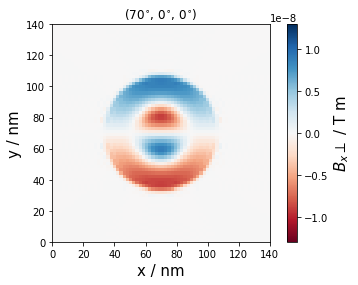

In [107]:
plt.imshow(np.flipud(bxs[20:-20,35,20:-20].T),cmap='RdBu',vmax=np.max(bxs),vmin=np.min(bxs),extent=[0,140,0,140])
cbar = plt.colorbar()
cbar.set_label(r'$B_x\perp$ / T m',fontsize=15)
plt.xlabel('x / nm',fontsize=15)
plt.ylabel('y / nm',fontsize=15)
plt.title('(%i$^{\circ}$, %i$^{\circ}$, %i$^{\circ}$)' % (as_x[70][0],as_x[70][1],as_x[70][2]))

In [104]:
import imageio

fpaths=[]
for i in np.arange(np.shape(bxs)[1]):
    fpath = r'gif3/%i.png' % i
    
    plt.imshow(np.flipud(bxs[20:-20,i,20:-20].T),cmap='RdBu',vmax=np.max(bxs),vmin=np.min(bxs),extent=[0,140,0,140])
    cbar = plt.colorbar()
    cbar.set_label(r'$B_x\perp$ / T m',fontsize=15)
    plt.xlabel('x / nm',fontsize=15)
    plt.ylabel('y / nm',fontsize=15)
    plt.title('(%i$^{\circ}$, %i$^{\circ}$, %i$^{\circ}$)' % (as_x[i][0],as_x[i][1],as_x[i][2]))
    plt.savefig(fpath)
    fpaths.append(fpath)
    plt.close()
    
images = []
for f in fpaths:
    images.append(imageio.imread(f))
for f in fpaths[::-1]:
    images.append(imageio.imread(f))    
imageio.mimsave(r'gif3/resbx.gif',images)

In [105]:
import imageio

fpaths=[]
for i in np.arange(np.shape(bys)[1]):
    fpath = r'gif4/%i.png' % i
    
    plt.imshow(np.flipud(bys[20:-20,i,20:-20].T),cmap='RdBu',vmax=np.max(bys),vmin=np.min(bys),extent=[0,140,0,140])
    cbar = plt.colorbar()
    cbar.set_label(r'$B_x\perp$ / T m',fontsize=15)
    plt.xlabel('x / nm',fontsize=15)
    plt.ylabel('y / nm',fontsize=15)
    plt.title('(%i$^{\circ}$, %i$^{\circ}$, %i$^{\circ}$)' % (as_y[i][0],as_y[i][1],as_y[i][2]))
    plt.savefig(fpath)
    fpaths.append(fpath)
    plt.close()
    
images = []
for f in fpaths:
    images.append(imageio.imread(f))
for f in fpaths[::-1]:
    images.append(imageio.imread(f))    
imageio.mimsave(r'gif4/resby.gif',images)

In [109]:
n_iter=100
bx_recon,by_recon = ma.dual_axis_reconstruction(bxs,bys,as_x,as_y,mesh_params,niter=n_iter,algorithm='SIRT3D_CUDA',callback_freq=5)
bz_recon = ma.dual_axis_bz_from_bxby(bx_recon,by_recon)

../multi_axis.py:2190: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


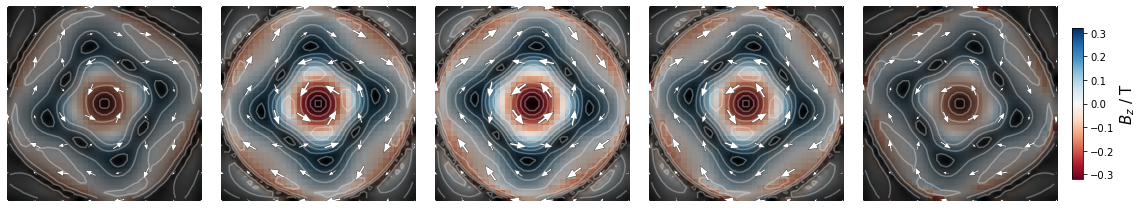

In [110]:
ma.plot_B_series(bx_recon[n:-n,n:-n,n:-n],by_recon[n:-n,n:-n,n:-n],bz_recon[n:-n,n:-n,n:-n],slices=[13,15,19,20,22])

In [111]:
ma.save_B_to_paraview('B-recon_skyrmion.vts',bx_recon[n:-n,n:-n,n:-n],by_recon[n:-n,n:-n,n:-n],bz_recon[n:-n,n:-n,n:-n])

In [112]:
as_x,as_y,pxs,pys = ma.dual_axis_phase_generation(MX,MY,MZ,mesh_params,n_tilt= 91,a_range=90,n_pad=n)

In [114]:
bxs,bys = ma.dual_axis_B_generation(pxs,pys,mesh_params2)


In [115]:
bx_recon,by_recon = ma.dual_axis_reconstruction(bxs,bys,as_x,as_y,mesh_params,niter=n_iter,algorithm='SIRT3D_CUDA',callback_freq=5)
bz_recon = ma.dual_axis_bz_from_bxby(bx_recon,by_recon)

In [116]:
ma.save_B_to_paraview('B-recon2_skyrmion.vts',bx_recon[n:-n,n:-n,n:-n],by_recon[n:-n,n:-n,n:-n],bz_recon[n:-n,n:-n,n:-n])